# IRIS FLOWER CLASSIFICATION

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
#taking the dataset using the file name
dataset=pd.read_csv('iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
dataset=dataset.drop(columns =["Id"])
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#finding the shape of the datset
dataset.shape

(150, 5)

In [6]:
#describing the dataset
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#counting the different Kinds of species present in the dataset
dataset['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Preprocessing the dataset

In [9]:
# checking the null values in the dataset 
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

here there is no null values present in the dataset.

## Data anaylsis

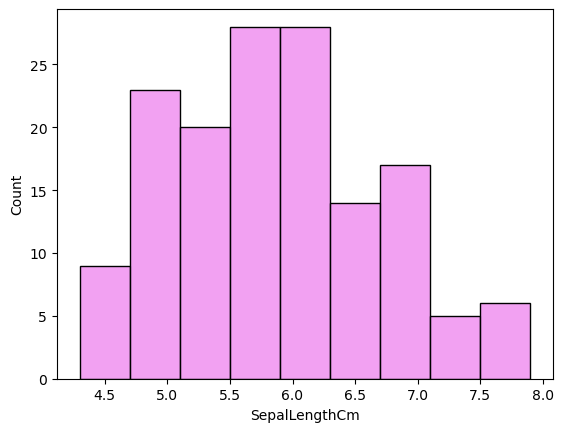

In [10]:
#Visualizing the sepallength using histogram
sns.histplot(x=dataset['SepalLengthCm'],color='violet')
plt.show()

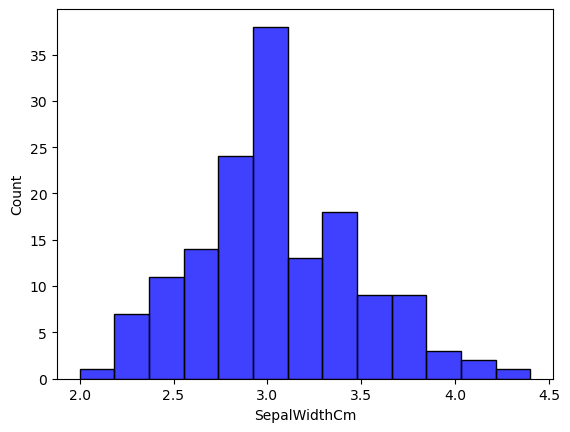

In [11]:
#Visualizing the sepal width using histogram
sns.histplot(x=dataset['SepalWidthCm'],color='blue')
plt.show()

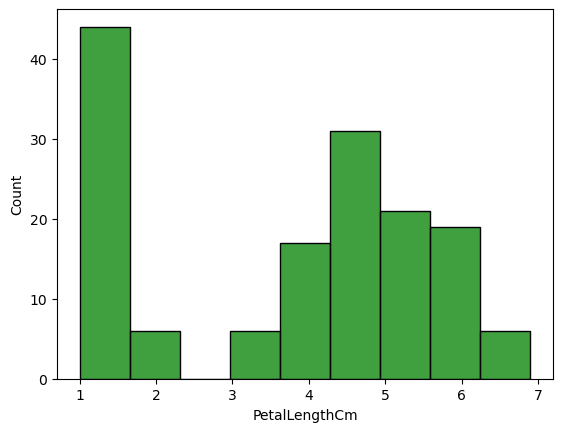

In [12]:
#Visualizing the petal length using histogram
sns.histplot(x=dataset['PetalLengthCm'],color='green')
plt.show()

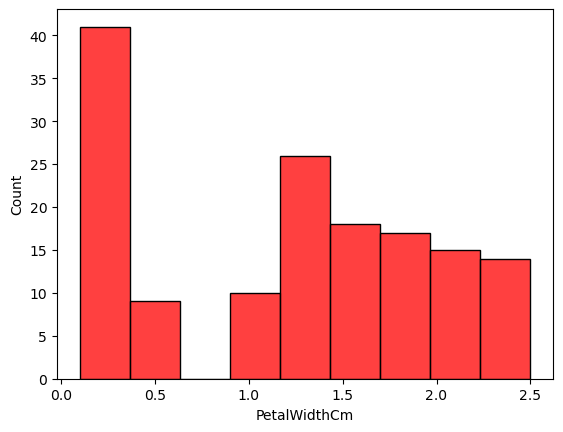

In [13]:
#Visualizing the petal Width using histogram
sns.histplot(x=dataset['PetalWidthCm'],color='red')
plt.show()

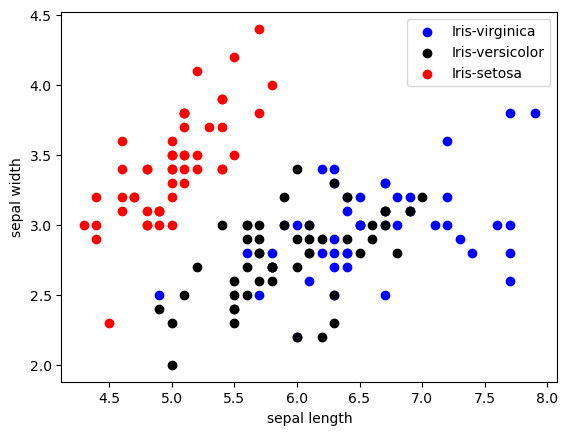

In [14]:
# Scatterplot between sepal length and sepal width varying with species
color = ['blue','black','red']
Species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = dataset[dataset['Species'] == Species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c = color[i],label = Species[i])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()
plt.show()

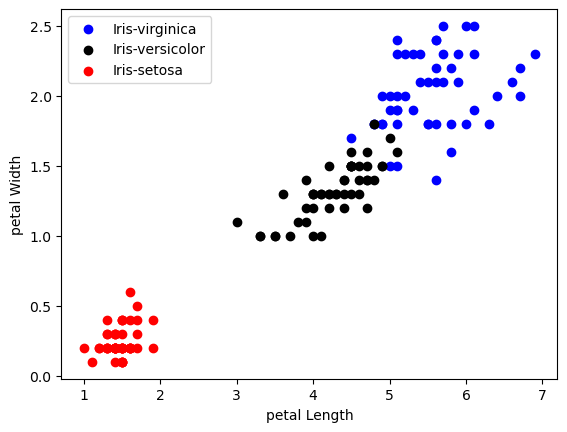

In [15]:
# Scatterplot between petal length and petal width varying with species
for i in range(3):
    x = dataset[dataset['Species'] == Species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = color[i], label = Species[i])
    
plt.xlabel("petal Length")
plt.ylabel("petal Width")
plt.legend()
plt.show()

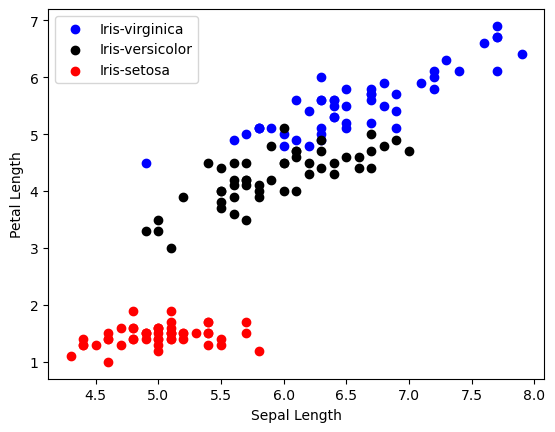

In [16]:
# Scatterplot between sepal length and petal lenght varying with species
for i in range(3):
    x = dataset[dataset['Species'] == Species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = color[i], label = Species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
plt.show()

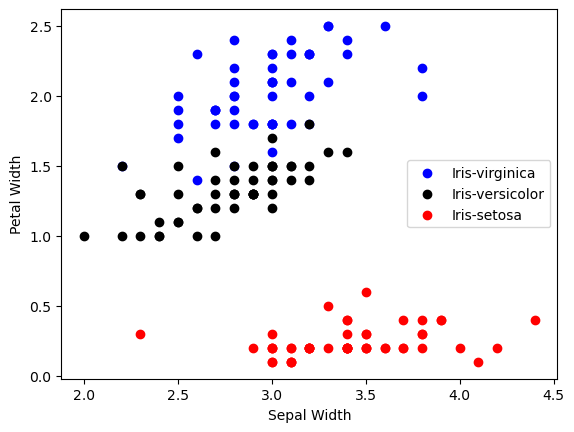

In [17]:
# Scatterplot between sepal width and petal width varying with species
for i in range(3):
    x = dataset[dataset['Species'] == Species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = color[i], label = Species[i])
    
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

# Correlation Matrix

In [19]:
#Finding the correlation of the matrix
correlation=dataset[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].corr()
correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


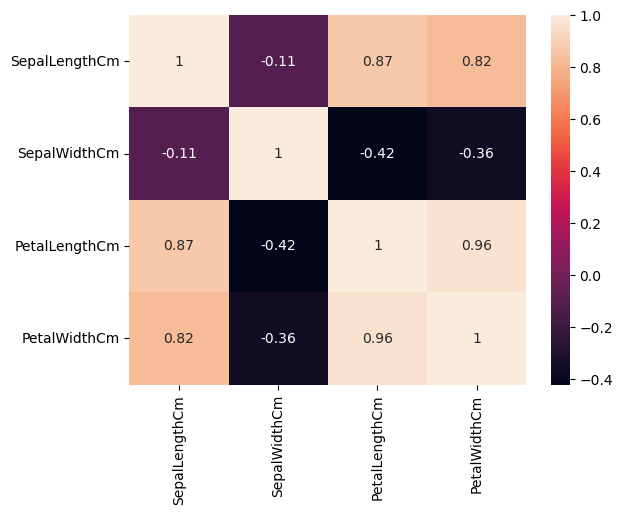

In [20]:
#Visualizing the correlation using heatmap
sns.heatmap(correlation,annot=True)
plt.show()

# Label Encoding

In [21]:
#labelling the data of Species column
lab_enc=LabelEncoder()
dataset['Species']=lab_enc.fit_transform(dataset['Species'])
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### here label encoder converted the'Iris-virginica','Iris-versicolor','Iris-setosa' into 2,1,0 Respectively.

# Training the Model

In [22]:
#Splitting the data into target and features where target=Y features = X
Y=dataset["Species"]
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [23]:
X=dataset.drop(columns=['Species'])
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [25]:
#logistic Regression
Model1=LogisticRegression()
Model1.fit(x_train,y_train)

LogisticRegression()

In [26]:
y_prediction=Model1.predict(x_test)
y_prediction

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0])

In [27]:
#the score of the Linear Regression model
score1=accuracy_score(y_test,y_prediction)
print("Accuracy:",score1*100)

Accuracy: 97.77777777777777


In [28]:
#KNN
Model2=KNeighborsClassifier(n_neighbors=3)
Model2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
y_prediction1=Model2.predict(x_test)
y_prediction1

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0])

In [30]:
#the score of the KNN model
score2=accuracy_score(y_test,y_prediction1)
print("Accuracy:",score2*100)

Accuracy: 97.77777777777777


In [31]:
# Decision Tree
Model3=DecisionTreeClassifier()
Model3=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=4)
Model3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [32]:
y_prediction2=Model3.predict(x_test)
y_prediction2

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0])

In [33]:
#the score of the Decision tree
score3=accuracy_score(y_test,y_prediction2)
print("Accuracy:",score3*100)

Accuracy: 95.55555555555556


# Confusion Matrix

In [35]:
confusion=confusion_matrix(y_test,y_prediction)
confusion

array([[16,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 17]], dtype=int64)

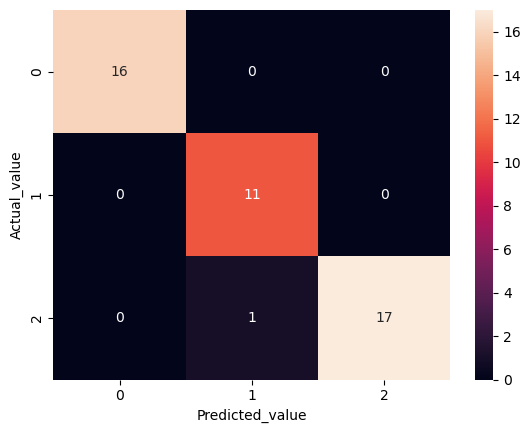

In [36]:
#visualizing the confusion matrix of data in heat maps
sns.heatmap(confusion,annot=True)
plt.xlabel('Predicted_value')
plt.ylabel('Actual_value')
plt.show()

In [38]:
#classification report for the dataset
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Received the Accuracy of 97.8